**A) class, object, property, method, encapsulation, inheritance, grammar vs class, superclass, subclass**

B) instance vs class variables: declaring, initializing

C) __dict__ property (objects vs classes)

D) private components (instance vs classes), name mangling

E) methods: declaring, using, self parameter

F) instrospection: hasattr() (objects vs classes)

G) inheritance: single, multiple, isinstance(), overriding, not is and is operators

H) constructors: declaring and invoking

I) polymorphism

K) __name__, __module__, __bases__ properties, __str__() method

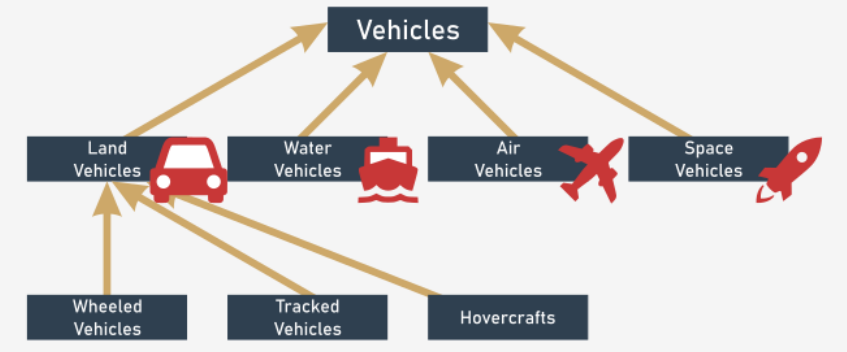

When a class is derived from another class, their relation is named **inheritance**

The vehicles class is very broad. Too broad. 

We have to define some more specialized classes, then.

The specialized classes are the subclasses. The vehicles class will be a superclass for them all.

Each subclass is more specialized (or more specific) than its superclass.

Conversely, each superclass is more general (more abstract) than any of its subclasses.

In [ ]:
class TheSimplestClass:
    pass

my_first_object = TheSimplestClass()

The definition begins with the keyword class. 

The keyword is followed by an **identifier** which will name the class (note: don't confuse it with the object's name - these are two different things).

The act of creating an object of the selected class is also called an **instantiation** (as the object becomes an instance of the class).

Objects are equipped with:

a **name** which identifies them and allows us to distinguish between them;

a set of **properties** (the set can be empty)

a set of **methods** (can be empty, too)

# B) instance vs class variables: declaring, initializing

# C) __dict__ property (objects vs classes)

**Instance Variable**

In [13]:
class ExampleClass:
    class_var = 5
    def __init__(self, val = 1):
        self.first = val

    def set_second(self, val):
        self.second = val


example_object_1 = ExampleClass()
example_object_2 = ExampleClass(2)

example_object_2.set_second(3)

example_object_3 = ExampleClass(4)
example_object_3.third = 6

print("class __dict__ :", ExampleClass.__dict__)
print("class dict keys :", ExampleClass.__dict__.keys())
print("class dict __dict__ :", ExampleClass.__dict__['__dict__'])
print("class dict __module__ :", ExampleClass.__dict__['__module__'])
print("class dict class_var :", ExampleClass.__dict__['class_var'])
#
print("object __dict__")
print(example_object_1.__dict__)
print(example_object_2.__dict__)
print(example_object_3.__dict__)

class __dict__ : {'__module__': '__main__', 'class_var': 5, '__init__': <function ExampleClass.__init__ at 0x000001E1FCA863A0>, 'set_second': <function ExampleClass.set_second at 0x000001E1FCA86430>, '__dict__': <attribute '__dict__' of 'ExampleClass' objects>, '__weakref__': <attribute '__weakref__' of 'ExampleClass' objects>, '__doc__': None}
class dict keys : dict_keys(['__module__', 'class_var', '__init__', 'set_second', '__dict__', '__weakref__', '__doc__'])
class dict __dict__ : <attribute '__dict__' of 'ExampleClass' objects>
class dict __module__ : __main__
class dict class_var : 5
object __dict__
{'first': 1}
{'first': 2, 'second': 3}
{'first': 4, 'third': 6}


The word **instance** suggests that they are closely connected to the objects (which are class instances), not to the classes themselves. Let's take a closer look at them.

the class named ExampleClass has a constructor, which unconditionally creates an **instance** variable named **first**

the class also has a **method** which creates another instance variable, named **second**;

example_object_3 has been **enriched** with a property named **third** just **on the fly**, outside the class's code

modifying an instance variable of any object has **NO** impact on all the remaining objects. Instance variables are perfectly **isolated** from each other.


**Class Variable**

In [ ]:
class ExampleClass:
    counter = 0
    def __init__(self, val = 1):
        self.__first = val
        ExampleClass.counter += 1


example_object_1 = ExampleClass()
example_object_2 = ExampleClass(2)
example_object_3 = ExampleClass(4)

print(example_object_1.__dict__, example_object_1.counter)
print(example_object_2.__dict__, example_object_2.counter)
print(example_object_3.__dict__, example_object_3.counter)

{'_ExampleClass__first': 1} 3
{'_ExampleClass__first': 2} 3
{'_ExampleClass__first': 4} 3


class variables **aren't** shown in an object's __dict__

a class variable always presents the **same** value in all class instances (objects)


# D) private components (instance vs classes), name mangling

two underscores (__) => **private**

When Python sees that you want to add an instance variable to an object and you're going to do it inside any of the object's methods, it **mangles** the operation in the following way:

it puts a class name **before** your name;

it puts an additional underscore at the **beginning**.

This is why the __first becomes _ExampleClass__first.

In [6]:
class ExampleClass:
    def __init__(self, val = 1):
        self.__first = val

    def set_second(self, val = 2):
        self.__second = val


example_object_1 = ExampleClass()
example_object_2 = ExampleClass(2)

example_object_2.set_second(3)

example_object_3 = ExampleClass(4)
example_object_3.__third = 5


print(example_object_1.__dict__)
print(example_object_2.__dict__)
print(example_object_3.__dict__)

print(example_object_2._ExampleClass__second)
print(example_object_3.__third)

{'_ExampleClass__first': 1}
{'_ExampleClass__first': 2, '_ExampleClass__second': 3}
{'_ExampleClass__first': 4, '__third': 5}
3
5


In [ ]:
# The name is now FULLY accessible from outside the class. You can run a code like this:

print(example_object_1._ExampleClass__first)

1


**Same for Class Variables**

In [8]:
class ExampleClass:
    __counter = 0
    def __init__(self, val = 1):
        self.__first = val
        ExampleClass.__counter += 1


example_object_1 = ExampleClass()
example_object_2 = ExampleClass(2)
example_object_3 = ExampleClass(4)

print(example_object_1.__dict__, example_object_1._ExampleClass__counter)
print(example_object_2.__dict__, example_object_2._ExampleClass__counter)
print(example_object_3.__dict__, example_object_3._ExampleClass__counter)

print(ExampleClass.__dict__)
print(ExampleClass._ExampleClass__counter)

{'_ExampleClass__first': 1} 3
{'_ExampleClass__first': 2} 3
{'_ExampleClass__first': 4} 3
{'__module__': '__main__', '_ExampleClass__counter': 3, '__init__': <function ExampleClass.__init__ at 0x00000237796AF310>, '__dict__': <attribute '__dict__' of 'ExampleClass' objects>, '__weakref__': <attribute '__weakref__' of 'ExampleClass' objects>, '__doc__': None}
3


Now we're going to take the opportunity to show you the DIFFERENT

between these two __dict__ variables, the one from the class and the one from the object.

As you can see, the class' __dict__ contains much more data than its object's counterpart.

Most of them are useless now - the one we want you to check carefully shows the current VARIA value.

Note that the object's __dict__ is empty - the object has no instance variables.

In [14]:
class ExampleClass:
    varia = 1
    def __init__(self, val):
        ExampleClass.varia = val


print(ExampleClass.__dict__)
example_object = ExampleClass(2)

print(ExampleClass.__dict__)
print(example_object.__dict__)
print(example_object.varia)
print(ExampleClass.varia)

{'__module__': '__main__', 'varia': 1, '__init__': <function ExampleClass.__init__ at 0x000001E1FCA86790>, '__dict__': <attribute '__dict__' of 'ExampleClass' objects>, '__weakref__': <attribute '__weakref__' of 'ExampleClass' objects>, '__doc__': None}
{'__module__': '__main__', 'varia': 2, '__init__': <function ExampleClass.__init__ at 0x000001E1FCA86790>, '__dict__': <attribute '__dict__' of 'ExampleClass' objects>, '__weakref__': <attribute '__weakref__' of 'ExampleClass' objects>, '__doc__': None}
{}
2
2


## F) instrospection: hasattr() (objects vs classes)

**Checking an attribute's existence**

In [ ]:
# you may NOT expect that all objects of the same class have the same sets of properties.

In [ ]:
class ExampleClass:
    def __init__(self, val):
        if val % 2 != 0:
            self.a = 1
        else:
            self.b = 1


example_object = ExampleClass(1)

print(example_object.a)

1


In [ ]:
print(example_object.b)
# As you can see, accessing a non-existing object (class) attribute causes an AttributeError exception.

AttributeError: ignored

Python provides a function which is able to safely check if any object/class contains a specified property. The function is named **hasattr**, and expects two arguments to be passed to it:

the class or the object being checked;
the name of the property whose existence has to be reported (note: it has to be a string containing the **attribute** name, not the name alone)

The function returns **True or False.**

hasattr() function can operate on **class variables** too

In [ ]:
class ExampleClass:
    def __init__(self, val):
        if val % 2 != 0:
            self.a = 1
        else:
            self.b = 1


example_object = ExampleClass(1)
print(example_object.a)

if hasattr(example_object, 'b'):
    print(example_object.b)

1


In [ ]:
class ExampleClass:
    a = 1
    def __init__(self):
        self.b = 2


example_object = ExampleClass()

print(hasattr(example_object, 'b'))
print(hasattr(example_object, 'a'))
print(hasattr(ExampleClass, 'b'))
print(hasattr(ExampleClass, 'a'))

True
True
False
True


# E) methods: declaring, using, self parameter

method is a function embedded inside a class.

In [ ]:
class Classy:
    def method(self, par):
        print("method:", par)


obj = Classy()
obj.method(1)
obj.method(2)
obj.method(3)

method: 1
method: 2
method: 3


The self parameter is used to obtain access to the object's **instance** and **class** variables.

In [ ]:
class Classy:
    varia = 2
    def method(self):
        print(self.varia, self.var)


obj = Classy()
obj.var = 3
obj.method()

2 3


The self parameter is also used to **invoke** other object/class methods from inside the class.

In [ ]:
class Classy:
    def other(self):
        print("other")

    def method(self):
        print("method")
        self.other()


obj = Classy()
obj.method()

method
other


If you name a method like this: __init__, it won't be a regular method - it will be a **constructor**.

In [10]:
class Classy:
    def __init__(self, value):
        self.var = value


obj_1 = Classy("object")

print(obj_1.var)
print(obj_1.__dict__)


object
{'var': 'object'}


property name **mangling** applies to method names, too

In [17]:
class Classy:
    def visible(self):
        print("visible")
    
    def __hidden(self):
        print("hidden")

obj = Classy()

try:
    obj.__hidden()
except Exception as E:
    print("failed with ", E)
    print("the correct ")
    obj._Classy__hidden()


failed with  'Classy' object has no attribute '__hidden'
the correct 
hidden


Each Python class and each Python object is pre-equipped with **a set of** useful **attributes** which can be used to examine its capabilities.

In [ ]:
class Classy:
    varia = 1
    def __init__(self):
        self.var = 2

    def method(self):
        pass

    def __hidden(self):
        pass


obj = Classy()

print(obj.__dict__)
print(Classy.__dict__)


{'var': 2}
{'__module__': '__main__', 'varia': 1, '__init__': <function Classy.__init__ at 0x7f73e92e4e60>, 'method': <function Classy.method at 0x7f73e92e45f0>, '_Classy__hidden': <function Classy.__hidden at 0x7f73e92e4b90>, '__dict__': <attribute '__dict__' of 'Classy' objects>, '__weakref__': <attribute '__weakref__' of 'Classy' objects>, '__doc__': None}


# K) __name__, __module__, __bases__ properties, __str__() method


The **property** "__name__" contains the name of the class. It's nothing exciting, just a string.

In [ ]:
# If you want to find the class of a particular object, you can use a function named type()

class Classy:
    pass

print(Classy.__name__)
obj = Classy()
print(type(obj).__name__)

Classy
Classy


In [ ]:
# Note: the __name__ attribute is absent from the object - it exists only inside classes.

# AttributeError

print(obj.__name__)

AttributeError: ignored

__module__ is a string, too - it stores the name of the module which contains the **definition** of the class.

In [ ]:
class Classy:
    varia = 1
    def __init__(self):
        self.var = 2

    def method(self):
        pass

    def __hidden(self):
        pass


obj = Classy()

print(obj.__module__)
print(Classy.__module__)

__main__
__main__


__bases__ is a tuple. The tuple contains classes (not class names) which are direct superclasses for the class.

Note: only classes have this attribute - objects don't.

In [ ]:
class SuperOne:
    pass


class SuperTwo:
    pass


class Sub(SuperOne, SuperTwo):
    pass

print(Sub.__bases__)

(<class '__main__.SuperOne'>, <class '__main__.SuperTwo'>)


__str__() defining your own method of the name.

In [ ]:
class Star:
    def __init__(self, name, galaxy):
        self.name = name
        self.galaxy = galaxy

    def __str__(self):
        return self.name + ' from __str__ ' + self.galaxy


sun = Star("Sun", "Milky Way")
print(sun)
print(Star.__name__)

Sun from __str__ Milky Way
Star


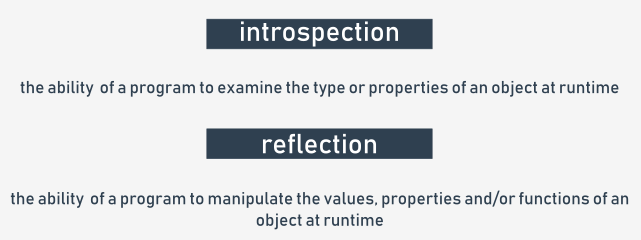

**Investigating classes**

In [1]:
class MyClass:
    pass


obj = MyClass()
obj.a = 1
obj.b = 2
obj.i = 3
obj.ireal = 3.5
obj.integer = 4
obj.z = 5

In [2]:
obj.__dict__.keys()

dict_keys(['a', 'b', 'i', 'ireal', 'integer', 'z'])

In [3]:
getattr(obj, "i")

3

In [4]:
setattr(obj, "i", 6)

In [5]:
getattr(obj, "i")

6

In [ ]:
isinstance(3, int)

True

# G) inheritance: single, multiple, isinstance(), issubclass(), overriding, not is and is operators

In [ ]:
# Issubclass()

**CLASS IN CLASS**

In [7]:
class Vehicle:
    pass


class LandVehicle(Vehicle):
    pass


class TrackedVehicle(LandVehicle):
    pass


for cls1 in [Vehicle, LandVehicle, TrackedVehicle]:
    for cls2 in [Vehicle, LandVehicle, TrackedVehicle]:
        print(issubclass(cls1, cls2), end="\t")
    print()

True	False	False	
True	True	False	
True	True	True	


In [10]:
print(issubclass(TrackedVehicle, Vehicle))
print(issubclass(Vehicle, Vehicle))

True
True


**OBJ IN CLASS**

In [ ]:
class Vehicle:
    pass


class LandVehicle(Vehicle):
    pass


class TrackedVehicle(LandVehicle):
    pass


my_vehicle = Vehicle()
my_land_vehicle = LandVehicle()
my_tracked_vehicle = TrackedVehicle()

for obj in [my_vehicle, my_land_vehicle, my_tracked_vehicle]:
    for cls in [Vehicle, LandVehicle, TrackedVehicle]:
        print(isinstance(obj, cls), end="\t")
    print()

True	False	False	
True	True	False	
True	True	True	


The is operator checks whether two variables (object_one and object_two here) refer to the same object. **NOT** the same class

In [11]:
class SampleClass:
    def __init__(self, val):
        self.val = val


object_1 = SampleClass(0)
object_2 = SampleClass(2)
object_3 = object_1
object_3.val += 1
object_4 = object_1

print(object_1 is object_2)
print(object_2 is object_3)
print(object_3 is object_1) # Both came from object_1
print(object_3 is object_4) # Both came from object_1
print(object_1.val, object_2.val, object_3.val)

False
False
True
True
1 2 1


**SINGLE INHERITANCE**

**Super.__init__(self, name)**

In [ ]:
class Super:
    sub_var = 1
    def __init__(self, name):
        self.name = name

    def __str__(self):
        return "My name is " + self.name + "."


class Sub(Super):
    def __init__(self, name):
        Super.__init__(self, name)


obj = Sub("Andy")

print(obj)
print(obj.sub_var)

My name is Andy.
1


Note: you can use this mechanism not only to invoke the superclass constructor, but also to get access to **any of the resources** available inside the superclass.

example -> the sub_var above

In [ ]:
class Super:
    def __init__(self, name="Duy"):
        self.name = name

    def __str__(self):
        return "My name is " + self.name + "."


class Sub(Super):
    def __init__(self, name="Khanh"):
        Super.__init__(self, name="Huy")


obj = Sub()

print(obj)

My name is Huy.


**super().__init__(name)**

In [ ]:
class Super:
    def __init__(self, name):
        self.name = name

    def __str__(self):
        return "My name is " + self.name + "."


class Sub(Super):
    def __init__(self, name):
        super().__init__(name)


obj = Sub("Andy")

print(obj)

My name is Andy.


**Override class variables**

In [ ]:
# Testing properties: class variables.
class Super:
    supVar = 1


class Sub(Super):
    subVar = 2


obj = Sub()

print(obj.subVar)
print(obj.supVar)

2
1


In [ ]:
class Level1:
    var = 100
    def fun(self):
        return 101


class Level2(Level1):
    var = 200
    def fun(self):
        return 201


class Level3(Level2):
    pass


obj = Level3()

print(obj.var, obj.fun())

200 201


**Override instance variables**

In [ ]:
# Testing properties: instance variables.
class Super:
    def __init__(self):
        self.supVar = 11


class Sub(Super):
    def __init__(self):
        super().__init__()
        self.subVar = 12


obj = Sub()

print(obj.subVar)
print(obj.supVar)

12
11


When you try to access any object's entity, Python will try to (in this order):

find it **inside** the object itself;

find it in **all classes** involved in the object's inheritance line from **bottom to top;**

In [ ]:
class Level1:
    variable_1 = 100
    def __init__(self):
        self.var_1 = 101

    def fun_1(self):
        return 102


class Level2(Level1):
    variable_2 = 200
    def __init__(self):
        super().__init__()
        self.var_2 = 201
    
    def fun_2(self):
        return 202


class Level3(Level2):
    variable_3 = 300
    def __init__(self):
        super().__init__()
        self.var_3 = 301

    def fun_3(self):
        return 302


obj = Level3()

print(obj.variable_1, obj.var_1, obj.fun_1())
print(obj.variable_2, obj.var_2, obj.fun_2())
print(obj.variable_3, obj.var_3, obj.fun_3())

100 101 102
200 201 202
300 301 302


**MULTIPLE INHERITANCE**

The Sub class has two superclasses: SuperA and SuperB. 

This means that the Sub class **inherits all the goods** offered by both SuperA and SuperB.

In [ ]:
class SuperA:
    var_a = 10
    def fun_a(self):
        return 11


class SuperB:
    var_b = 20
    def fun_b(self):
        return 21


class Sub(SuperA, SuperB):
    pass


obj = Sub()

print(obj.var_a, obj.fun_a())
print(obj.var_b, obj.fun_b())

10 11
20 21


We can say that Python looks for object components in the following order:

**inside** the object itself;

in its superclasses, from **bottom to top;**

if there is **more than one** class on a particular inheritance path, Python scans them from **left to right.**

In [ ]:
class Left:
    var = "L"
    var_left = "LL"
    def fun(self):
        return "Left"


class Right:
    var = "R"
    var_right = "RR"
    def fun(self):
        return "Right"


class Sub(Left, Right):
    pass


obj = Sub()

print(obj.var, obj.var_left, obj.var_right, obj.fun())

L LL RR Left


In [ ]:
class Left:
    var = "L"
    var_left = "LL"
    def fun(self):
        return "Left"


class Right:
    var = "R"
    var_right = "RR"
    def fun(self):
        return "Right"


class Sub(Right, Left):
    pass


obj = Sub()

print(obj.var, obj.var_left, obj.var_right, obj.fun())

R LL RR Right


# L) MRO, diamonds

In [ ]:
class Top:
    def m_top(self):
        print("top")


class Middle(Top):
    def m_middle(self):
        print("middle")


class Bottom(Middle, Top):
    def m_bottom(self):
        print("bottom")


object = Bottom()
object.m_bottom()
object.m_middle()
object.m_top()

print(Bottom.__mro__)

bottom
middle
top
(<class '__main__.Bottom'>, <class '__main__.Middle'>, <class '__main__.Top'>, <class 'object'>)


In [ ]:
class Top:
    def m_top(self):
        print("top")


class Middle(Top):
    def m_middle(self):
        print("middle")

# Changed from Mid -> Top, now Top -> Mid
class Bottom(Top, Middle):
    def m_bottom(self):
        print("bottom")


object = Bottom()
object.m_bottom()
object.m_middle()
object.m_top()

TypeError: ignored

**DIAMOND**

In [ ]:
class A:
    pass


class B(A):
    pass


class C(A):
    pass


class D(B, C):
    pass


d = D()

In [ ]:
print(D.mro())

[<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>]


# I) polymorphism

the subclass is able to modify its superclass behavior (just like in the example) is called **polymorphism**

In [ ]:
class One:
    def do_it(self):
        print("do_it from One")

    def doanything(self):
        self.do_it()


class Two(One):
    def do_it(self):
        print("do_it from Two")


one = One()
two = Two()

one.doanything()
two.doanything()

do_it from One
do_it from Two


**BEFORE** **polymorphism**

In [ ]:
class French:
  def say_hello(self):
    print("Bonjour")

class Vietnam:
  def say_hello(self):
    print("xin chao")

**AFTER Polymorphism**

polymorphism helps the developer to keep the code **clean** and **consistent**.

In [ ]:
class Lang:
  def say_hello(self):
    raise NotImplemented("Please use say hello in child class")

class French(Lang):
  def say_hello(self):
    print("Bonjour")

class Vietnam(Lang):
  def say_hello(self):
    print("xin chao")

def intro(Lang_obj):
  Lang_obj.say_hello()

duy = Vietnam()

intro(duy)

xin chao


In [ ]:
class Lang:
  def say_hello(self):
    raise NotImplemented("Please use say hello in child class")

class French(Lang):
  def say_hello(self):
    print("Bonjour")

class Vietnam(Lang):
  pass

def intro(Lang_obj):
  Lang_obj.say_hello()

duy = Vietnam()

intro(duy)

TypeError: ignored

**Composition** allows us to delegate some **responsibility** from one class to another class

**Composition** projects a class as a **container** able to **store** and use other objects

In [ ]:
class Salary:
    def __init__(self, pay, bonus):
        self.pay=pay
        self.bonus=bonus

    def annual_salary(self):
       return (self.pay*12) + self.bonus

class Employee:
    def __init__(self, name, age, pay, bonus):
        self.name=name
        self.age=age
        self.obj_salary=Salary(pay, bonus)

    def total_salary(self):
        return self.obj_salary.annual_salary()

emp = Employee('max', 25, 15, 10)
print(emp.total_salary())

190


In [ ]:
class Salary:
    def __init__(self, pay, bonus):
        self.pay=pay
        self.bonus=bonus

    def annual_salary(self):
       return (self.pay*12) + self.bonus

class Employee:
    def __init__(self, name, age, salary):
        self.name=name
        self.age=age
        self.salary=salary

    def total_salary(self):
        return self.salary.annual_salary()

emp = Employee('max', 25, Salary(15,10))
print(emp.total_salary())

190
